In [9]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from gensim import corpora, models
from sklearn.model_selection import train_test_split

In [10]:
file_path = 'C:/Users/Jitendra Sai/Downloads/dataset1.xlsx'
num_columns_to_read = len(pd.read_excel(file_path, nrows=1).columns)
df = pd.read_excel(file_path, usecols=range(num_columns_to_read))


# cleaning data
df['cleaned_text'] = df['Initial Prompt'].replace(r'\n', '', regex=True) #html cleaning
df['cleaned_text'] = df['Initial Prompt'].replace(r'<[^>]+>', '', regex=True) #html cleaning
df['cleaned_text'] = df['cleaned_text'].replace(r'http\S+', '', regex=True)
df['cleaned_text'] = df['cleaned_text'].replace(r'[^A-Za-z0-9\s]', '', regex=True)
df['cleaned_text'] = df['cleaned_text'].str.lower()

# preprocessing
df = df.dropna(how='any', subset=['Yes/No (Resolved or not)'])
df['Yes/No (Resolved or not)'] = df['Yes/No (Resolved or not)'].replace(['No '], 'No')
df['Yes/No (Resolved or not)'] = df['Yes/No (Resolved or not)'].replace(['Yes`', ' Yes'], 'Yes')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def process_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    return " ".join(tokens)

df['cleaned_text'] = df['cleaned_text'].apply(process_text)

# Display the first few rows of the processed data
df.head()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Jitendra Sai/nltk_data'
    - 'c:\\Program Files\\Python39\\nltk_data'
    - 'c:\\Program Files\\Python39\\share\\nltk_data'
    - 'c:\\Program Files\\Python39\\lib\\nltk_data'
    - 'C:\\Users\\Jitendra Sai\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:

df['Yes/No (Resolved or not)']=df['Yes/No (Resolved or not)'].replace({'Yes':1,'No':0})


Yes/No (Resolved or not)
Yes    441
No     163
Name: count, dtype: int64
L/H (Low or High)
L     415
H     141
l       1
:L      1
Name: count, dtype: int64
L/H (Low or High)
L    417
H    141
Name: count, dtype: int64
L/H (Low or High)
0.0    463
1.0    141
Name: count, dtype: int64


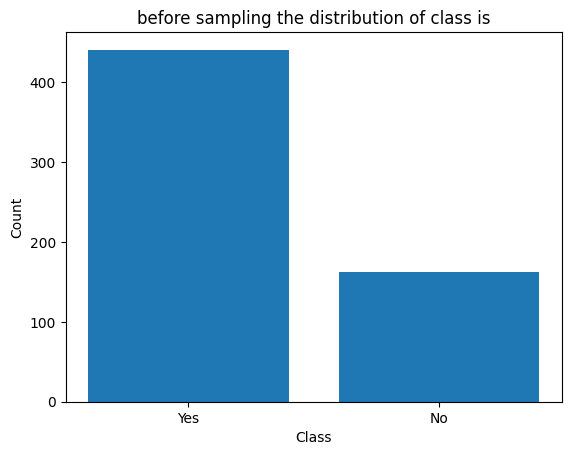

In [ ]:
import matplotlib.pyplot as plt
number= df['Yes/No (Resolved or not)'].value_counts()
plt.bar(['Yes','No'], number.values)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('before sampling the distribution of class is')
plt.show()

The most repeated word is 'using' with a count of 157.


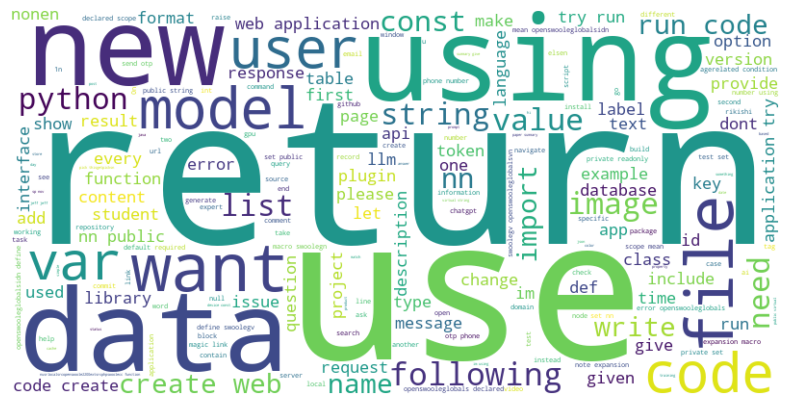

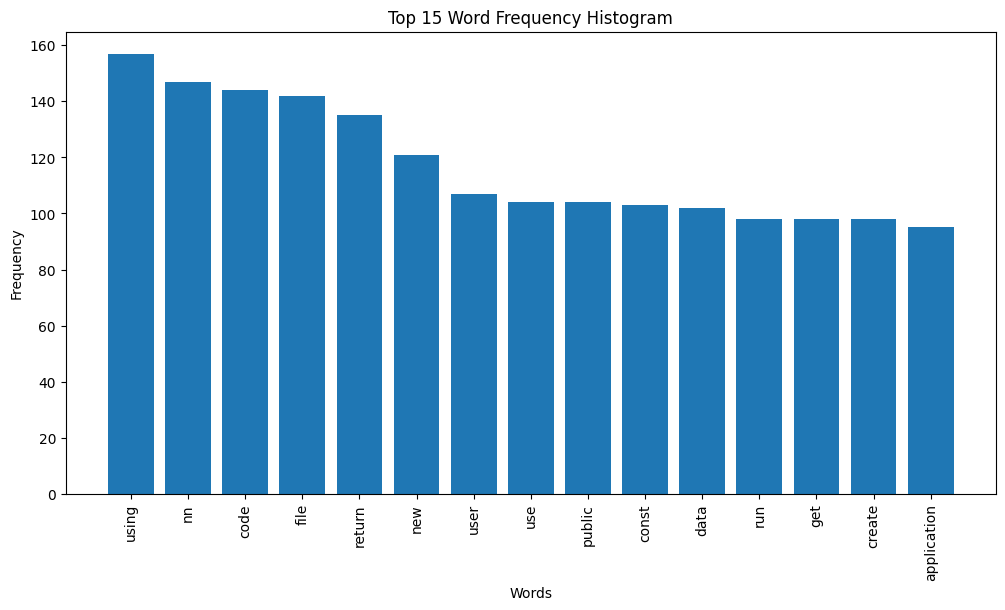

In [ ]:
def find_most_repeated_word(text):
    words = text.split()
    word_counts = Counter(words)
    most_repeated_word, count = word_counts.most_common(1)[0]
    return most_repeated_word, count

def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def generate_histogram(text, top_n=15):
    words = text.split()
    word_counts = Counter(words)
    top_words, top_counts = zip(*word_counts.most_common(top_n))
    plt.figure(figsize=(12, 6))
    plt.bar(top_words, top_counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Word Frequency Histogram')
    plt.xticks(rotation=90)
    plt.show()


input_text = " ".join(df['cleaned_text'])

most_repeated_word, count = find_most_repeated_word(input_text)
print(f"The most repeated word is '{most_repeated_word}' with a count of {count}.")

generate_word_cloud(input_text)
generate_histogram(input_text)

In [ ]:
# Ensuring a proportional representation of both 'Yes' and 'No'
#train_df, test_df = train_test_split(df, train_size=0.8, stratify=df['Yes/No (Resolved or not)'], random_state=42)
#x_train=train_df.drop(columns=['Yes/No (Resolved or not)'])
#y_train=train_df['Yes/No (Resolved or not)']
#x_test=test_df.drop(columns=['Yes/No (Resolved or not)'])
#y_test=test_df['Yes/No (Resolved or not)']

In [ ]:
def calculate_tf_idf(corpus):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
    return tfidf_matrix.toarray()

def create_bag_of_words(corpus):
    count_vectorizer = CountVectorizer()
    bag_of_words = count_vectorizer.fit_transform(corpus)
    return bag_of_words

def train_word2vec_model(sentences, vector_size=100, window=5, min_count=1, sg=0):
    model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, sg=sg)
    return model

In [ ]:
#x_train_vectors = calculate_tf_idf(x_train['cleaned_text'])
#x_test_vectors = calculate_tf_idf(x_test['cleaned_text'])
vectors=calculate_tf_idf(df['cleaned_text'])


In [ ]:
x_train_vectors.shape
y_train.shape
vectors.shape

(604, 6402)

In [ ]:
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy=0.8,random_state=42)
x_data_sampled,y_data_sampled=over.fit_resample(vectors,df['Yes/No (Resolved or not)'])

In [ ]:
print(x_data_sampled.shape)
y_data_sampled.value_counts()
#print(x_.shape)
#print(x_test_vectors.shape)
#print(y_test.shape)

(793, 6402)


Yes/No (Resolved or not)
1    441
0    352
Name: count, dtype: int64

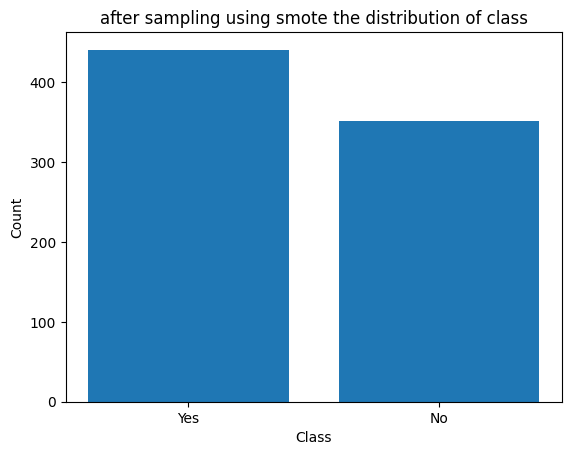

In [ ]:
import matplotlib.pyplot as plt
counts = y_data_sampled.value_counts()
plt.bar(['Yes','No'], counts.values)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('after sampling using smote the distribution of class')
plt.show()